In [196]:
#Objectives
#1. Building a tensorflow churn model.
#2. Training and predicting.
#3.Saving the model and reloading

In [197]:
#Needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf 
from tensorflow import keras # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # type: ignore
from tensorflow.keras.optimizers import Adam  # type: ignore 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")






In [198]:
#Loading the dataset
df = pd.read_csv('Churn.csv')
df.head(10)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
8,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
9,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [200]:
#Initial inspection
#Checking for the number of rows and columns
df.shape


(7044, 21)

In [201]:
# Descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Senior Citizen,7044.0,0.162124,0.368590,0.00,0.0,0.00,0.00,1.00
tenure,7044.0,32.366695,24.560582,0.00,9.0,29.00,55.00,72.00
Monthly Charges,7044.0,64.756736,30.090786,18.25,35.5,70.35,89.85,118.75


In [202]:
#Checking for null/missing values

print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [204]:
#converting of 'Total Charges' to float data type
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')



In [205]:

# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [206]:
print("Data types after conversion:")
df.dtypes

Data types after conversion:


Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [207]:
#Inspecting again the dataset
df.head(10)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
9,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [208]:
#Dropping the column not necessary
remove = ['Customer ID']
to_drop =[col for col in remove if col in df.columns]
df.drop(to_drop,axis=1,inplace=True)

In [209]:
#Handling missing and  incorrect values
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')
df['Total Charges'] =df['Total Charges'].fillna(df['Total Charges'].median(),inplace=True)

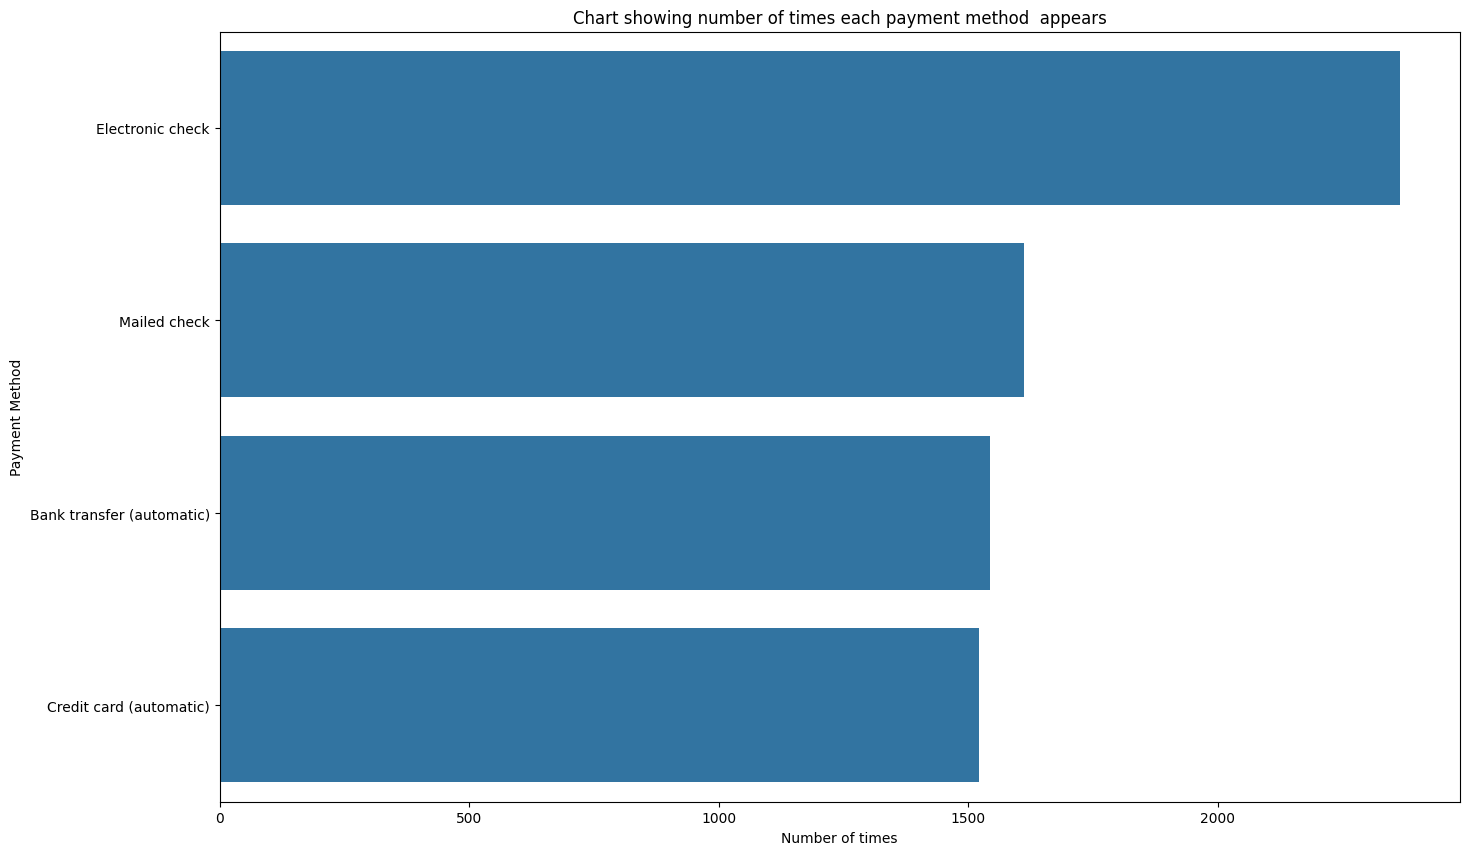

In [210]:
#Visualizing  Payment Method distribution 
plt.subplots(figsize=(16,10))
sb.countplot(df['Payment Method'])
plt.title("Chart showing number of times each payment method  appears")
plt.xlabel("Number of times")
plt.show()

In [211]:
categorical_cols = [
    'Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
    'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
    'Contract','Paperless Billing','Payment Method','Total Charges','Churn']
for col in categorical_cols:
        label_enc = LabelEncoder()
        df[col] = label_enc.fit_transform(df[col])
    
                                                             
    

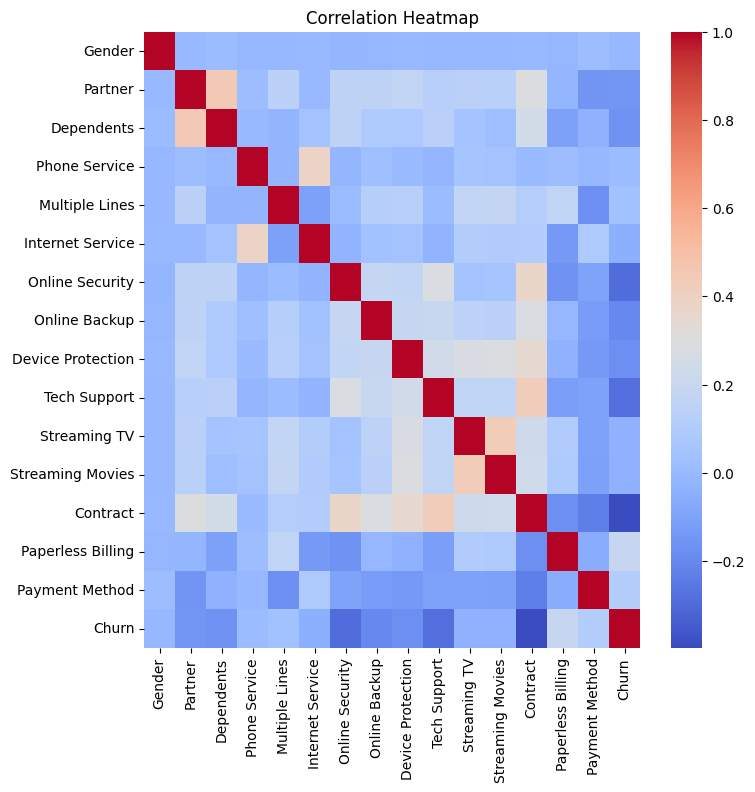

In [212]:
corr_matrix =df[['Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service',
    'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
    'Contract','Paperless Billing','Payment Method','Churn']].corr()
plt.figure(figsize =(8,8))
sb.heatmap(corr_matrix,cmap='coolwarm',annot=False,cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [213]:
cols_to_drop = [col for col in ['Customer ID', 'Churn'] if col in df.columns]
features = df.drop(cols_to_drop, axis=1)
target = df['Churn'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape[0]


5635

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [215]:
#training
EPOCHS = 20
DATASET_DIR = "churntensorflow"
MODEL_PATH = "Churn_model.h5"
model=Sequential([
    Dense(32,activation='linear',input_shape=(features.shape[1],)),
    Dense(1, activation='linear'),
    Dropout(0.5)
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss= 'mean_squared_error',
              metrics=['mse'])


In [216]:
callbacks = [
        ModelCheckpoint(MODEL_PATH, save_best_only=True),#Saves the best version of your model during training (best validation accuracy).
        EarlyStopping(patience=5, restore_best_weights=True)#Stops training early if validation loss doesn't improve for 5 epochs, and restores the best weights.
    ]

In [217]:
#Training model
history = model.fit(X_train,Y_train,epochs =EPOCHS,batch_size= 32,validation_split =0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 1.7273 - mse: 1.7273 - val_loss: 0.6271 - val_mse: 0.6271
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0326 - mse: 1.0326 - val_loss: 0.4169 - val_mse: 0.4169
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6836 - mse: 0.6836 - val_loss: 0.3039 - val_mse: 0.3039
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.2461 - val_mse: 0.2461
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3307 - mse: 0.3307 - val_loss: 0.2145 - val_mse: 0.2145
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2685 - mse: 0.2685 - val_loss: 0.1966 - val_mse: 0.1966
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.1894 - val_mse: 0.1894
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2318 - mse: 0.2318 - val_loss: 0.1842 - val_mse: 0.1842
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - 

In [218]:
#model evaluation
test_loss, test_mse = model.evaluate(X_val, Y_val)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MSE: {test_mse:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1754 - mse: 0.1754
Test Loss (MSE): 0.1690
Test MSE: 0.1690


In [219]:
#Model prediction

from sklearn.metrics import mean_squared_error as mse
train_preds = model.predict(X_train)
print('Training error:', (Y_train, train_preds))
Val_Preds = model.predict(X_val)
print('Validation Error:', mse(Y_val, Val_Preds))


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training error: (array([0, 1, 1, ..., 0, 0, 0]), array([[ 0.29870006],
       [-0.04777894],
       [ 0.2902986 ],
       ...,
       [ 0.12585458],
       [ 0.15099636],
       [-0.05130438]], dtype=float32))
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Validation Error: 0.1690143346786499


In [220]:
train_loss = history.history['loss']           # Training loss per epoch
val_loss = history.history['val_loss']         # Validation loss per epoch

train_mse = history.history['mse']             # Training MSE per epoch 
val_mse = history.history['val_mse']           # Validation MSE per epoch

In [221]:
print(history.history)

{'loss': [1.540541648864746, 0.9124552011489868, 0.591774046421051, 0.4138698875904083, 0.31751182675361633, 0.26684266328811646, 0.23847559094429016, 0.22281931340694427, 0.21913495659828186, 0.2125193327665329, 0.2071681022644043, 0.20866166055202484, 0.206390380859375, 0.2045736014842987, 0.20012463629245758, 0.20829370617866516, 0.2007339894771576, 0.20326149463653564, 0.2041049301624298, 0.20523636043071747], 'mse': [1.540541648864746, 0.9124552011489868, 0.591774046421051, 0.4138698875904083, 0.31751182675361633, 0.26684266328811646, 0.23847559094429016, 0.22281931340694427, 0.21913495659828186, 0.2125193327665329, 0.2071681022644043, 0.20866166055202484, 0.206390380859375, 0.2045736014842987, 0.20012463629245758, 0.20829370617866516, 0.2007339894771576, 0.20326149463653564, 0.2041049301624298, 0.20523636043071747], 'val_loss': [0.6271364688873291, 0.4168568253517151, 0.30387696623802185, 0.2461121380329132, 0.21449778974056244, 0.19656385481357574, 0.18942208588123322, 0.1842201

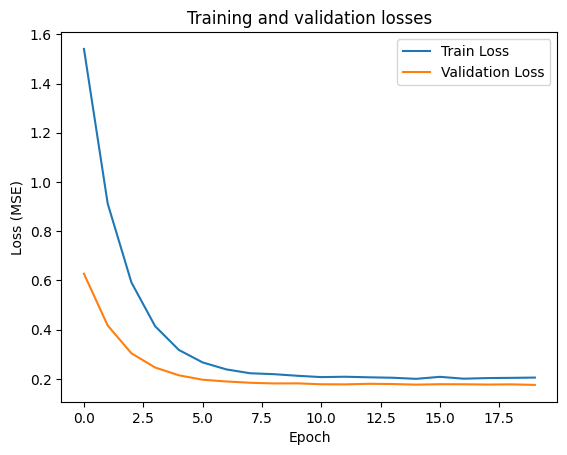

In [222]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and validation losses')
plt.legend()
plt.show()

In [223]:
#saving the model
model.save("Churn_model.h5")


In [224]:
from tensorflow.keras.models import load_model # type: ignore

model = load_model("Churn_model.h5")
